# Decision Tree
Analyst: Patricia P. Maumba

Purpose: Creating a decision tree model to predict passenger survival after the Titanic sinking.

Decision tree model for survival prediction


Dataset:  “Titanic_tree.csv” 

In [2]:
# import the necessary libraries
import pandas as pd
from sklearn import model_selection as skms
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

# To make sure our transformed data remains in a dataframe
set_config(transform_output="pandas")

# Limit notebook display and pandas output decimals
%precision 4
pd.options.display.precision = 3

Convert the dataset into dataframe named “titanic”. 

In [3]:
# Load the Titanic_tree dataset.
titanic = pd.read_csv("../data/Titanic_tree.csv")
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   object 
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,N,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,S
1,N,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.000,S
2,N,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.000,S
3,N,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.000,S
4,N,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.879,S


3. Use a 20% test data size and a random seed of 99. You will predict the value of the survived
attribute.

Reducing the dataframe so you only use the age, passenger class, gender, sibsp, and parch data
attributes as predictors (i.e., drop the other columns).

In [4]:
# Reduce the dataset by dropping unwanted columns.
titanic.drop(columns=['name', 'ticket', 'fare', 'embarked'], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   object 
 1   pclass    1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 61.5+ KB


Analysis

There are null values in the “age” column. Drop those rows using the dataframe method
dropna().  

In [5]:
# Drop null values in 'age' column.
titanic.dropna(subset=['age'], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1046 non-null   object 
 1   pclass    1046 non-null   int64  
 2   sex       1046 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 57.2+ KB


Create a tree model. Evaluate the model using the test data, a confusion matrix, and the
classification report. 

In [6]:

# one hot encoding for categorical variables.
titanic = pd.get_dummies(titanic, columns=['sex', 'pclass'], drop_first=True)

In [7]:
# use named constants for options we might change
TEST_SIZE = 0.2
RANDOM_STATE = 99
TARGET = 'survived'
df = titanic

# Separate the target and features in the dataframe
target = df[TARGET]
features = df.drop(columns=[TARGET])

# one hot encoding for categorical variables.


# Split the data in target and features into train & test sets
(train_ftrs, test_ftrs,
 train_target, test_target) = skms.train_test_split(features,
                                                    target, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)
# no standardization needed for trees

In [8]:
# create & fit a tree to the training data
dt    = tree.DecisionTreeClassifier(max_depth=4)
model = dt.fit(train_ftrs, train_target)
preds = model.predict(test_ftrs)

              precision    recall  f1-score   support

           N     0.7792    0.9524    0.8571       126
           Y     0.8929    0.5952    0.7143        84

    accuracy                         0.8095       210
   macro avg     0.8360    0.7738    0.7857       210
weighted avg     0.8247    0.8095    0.8000       210



<function matplotlib.pyplot.show(close=None, block=None)>

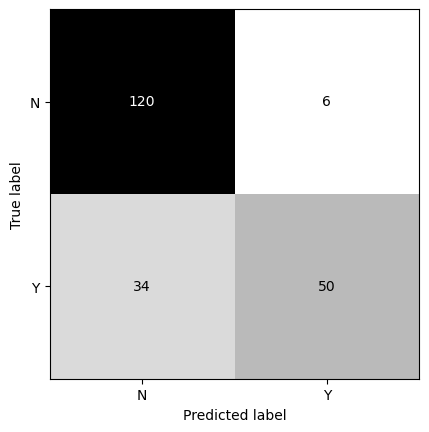

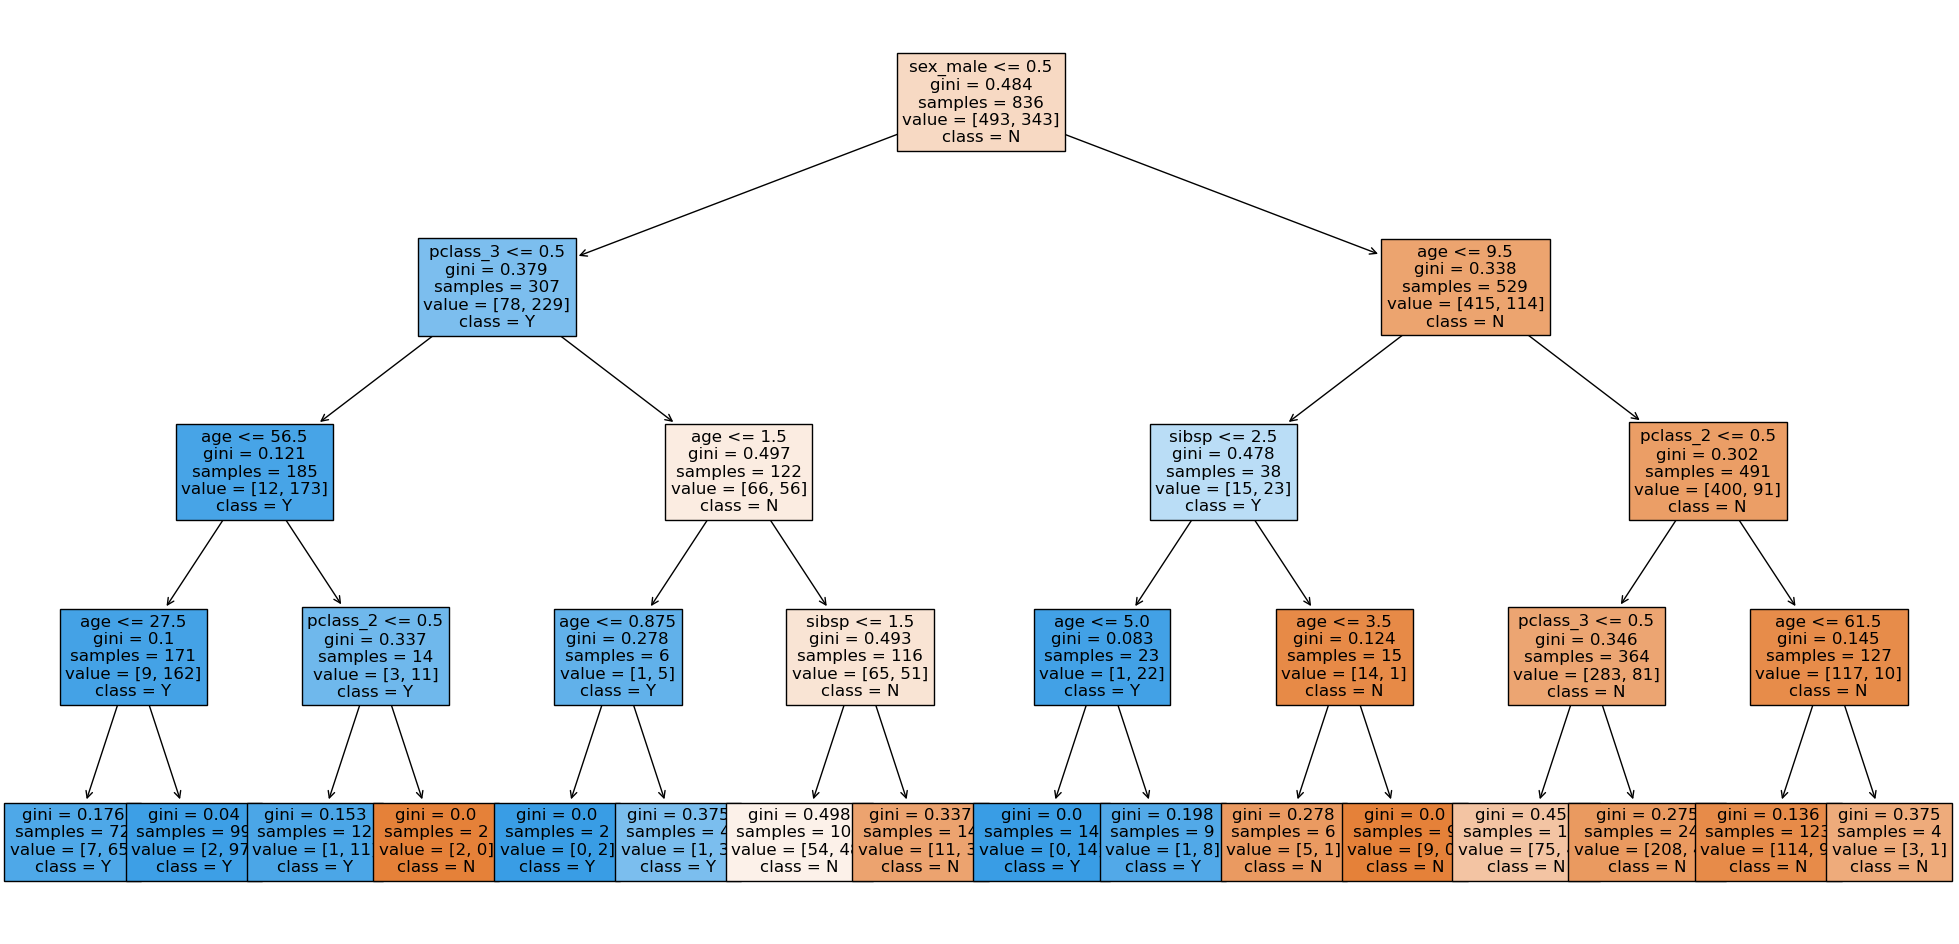

In [9]:
# display confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target, 
                                                preds,
                                                colorbar=False,
                                                cmap='Greys')
# Display the classification report
print(metrics.classification_report(test_target,
                                    preds, 
                                    digits=4,
                                    zero_division=0))
# Plot the tree using test data
plt.figure(figsize=(25, 12))   

# options we can change to make it look better
tree.plot_tree(model, 
               feature_names = test_ftrs.columns.tolist(),
               class_names = model.classes_.tolist(),
               filled = True,
               fontsize = 12)
plt.show

              precision    recall  f1-score   support

           N     0.7792    0.9524    0.8571       126
           Y     0.8929    0.5952    0.7143        84

    accuracy                         0.8095       210
   macro avg     0.8360    0.7738    0.7857       210
weighted avg     0.8247    0.8095    0.8000       210



<function matplotlib.pyplot.show(close=None, block=None)>

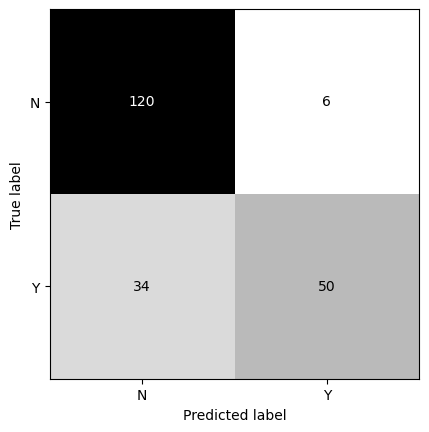

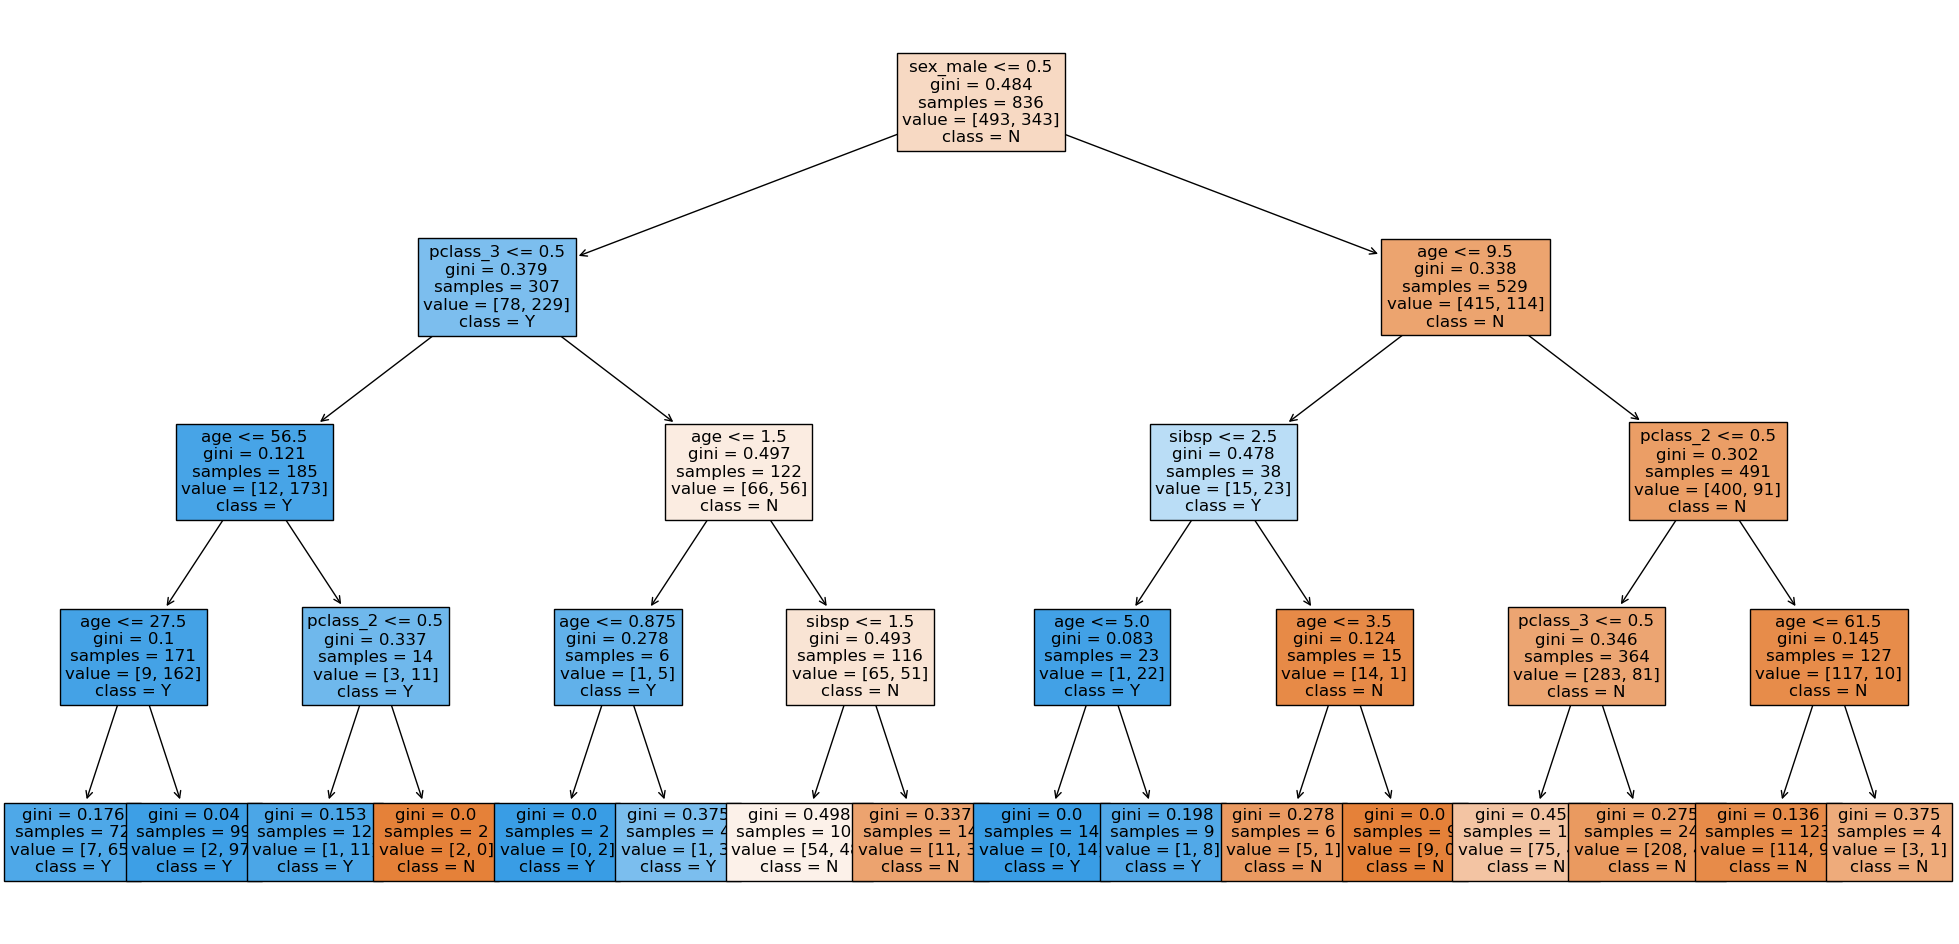

In [10]:


# display confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target, 
                                                preds,
                                                colorbar=False,
                                                cmap='Greys')
# Display the classification report
print(metrics.classification_report(test_target,
                                    preds, 
                                    digits=4,
                                    zero_division=0))

# Plot the tree using test data
plt.figure(figsize=(25, 12))   

# options we can change to make it look better
tree.plot_tree(model, 
               feature_names = test_ftrs.columns.tolist(),
               class_names = model.classes_.tolist(),
               filled = True,
               fontsize = 12)
plt.show

Analysis

> The final model has a higher accuracy rate of 0.8381 which is significantly higher than the rest.

Plotting the final decision tree.

              precision    recall  f1-score   support

           N     0.7792    0.9524    0.8571       126
           Y     0.8929    0.5952    0.7143        84

    accuracy                         0.8095       210
   macro avg     0.8360    0.7738    0.7857       210
weighted avg     0.8247    0.8095    0.8000       210



<function matplotlib.pyplot.show(close=None, block=None)>

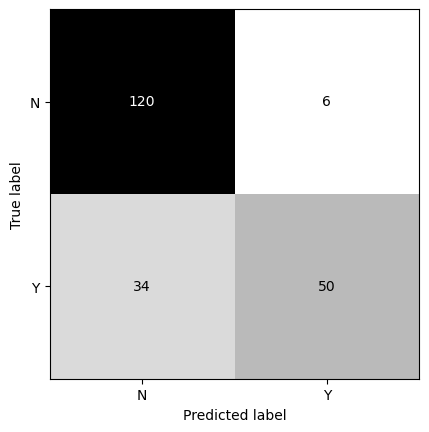

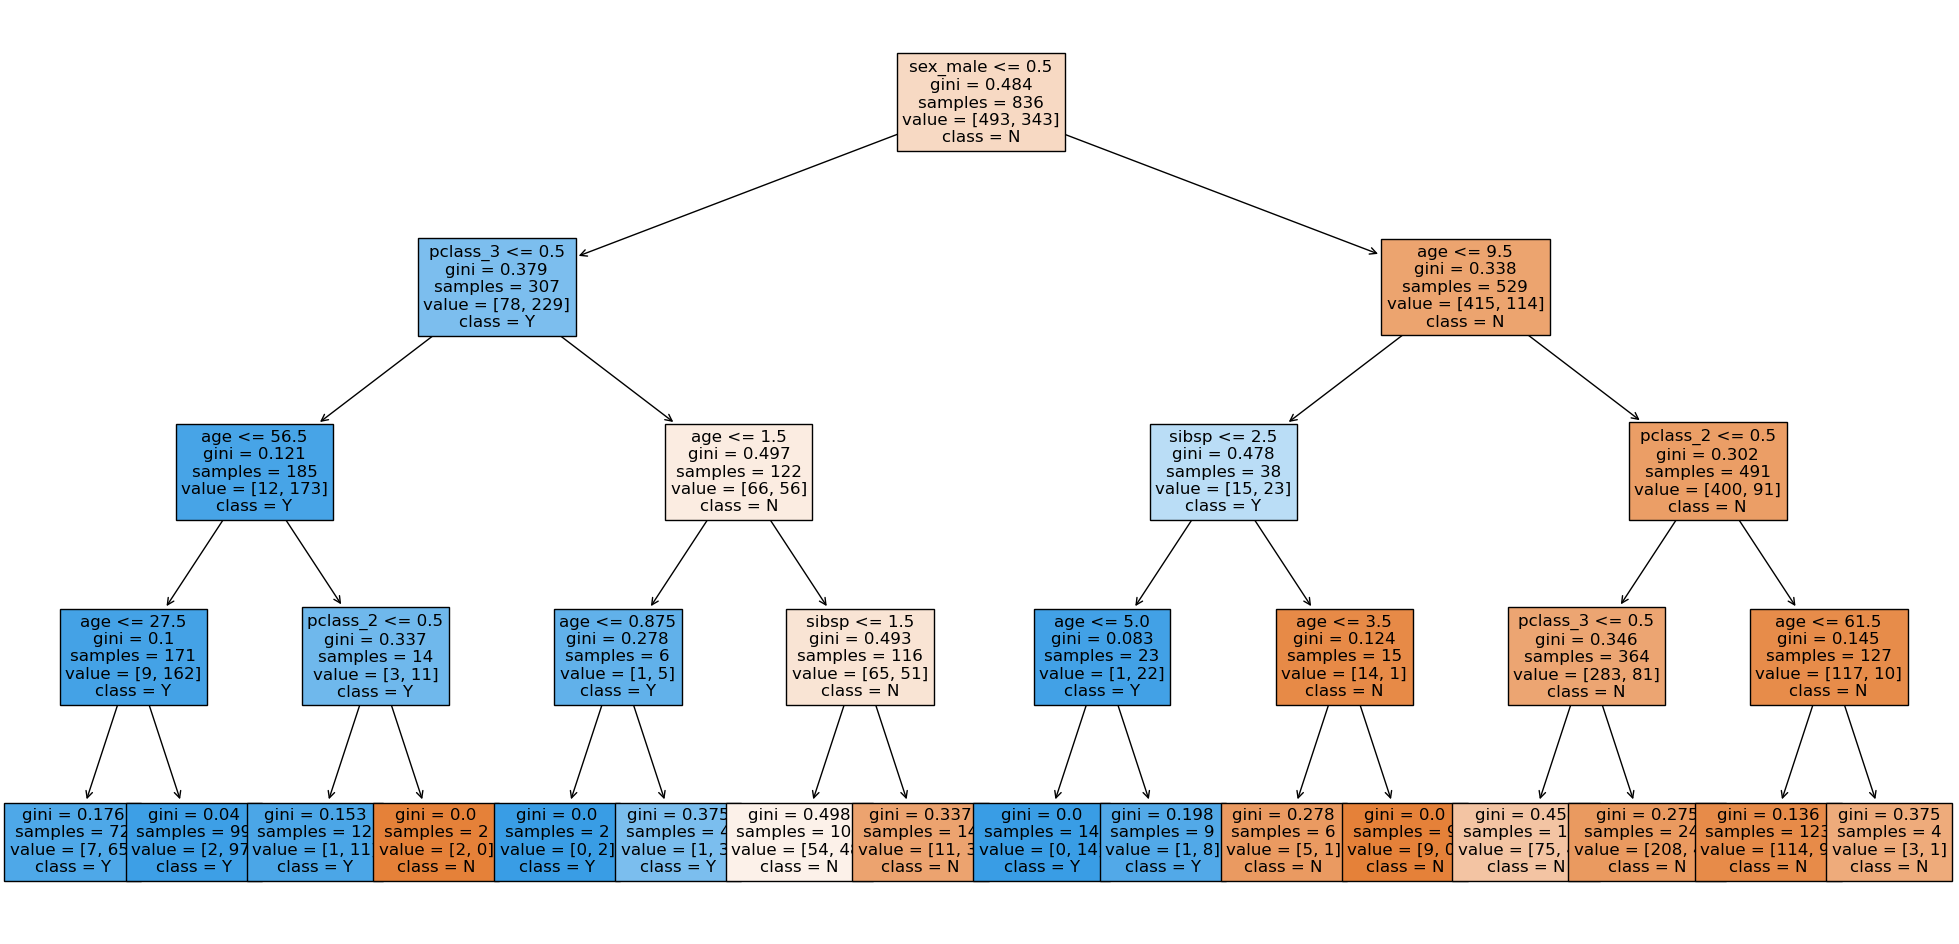

In [11]:

# display confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target, 
                                                preds,
                                                colorbar=False,
                                                cmap='Greys')
# Display the classification report
print(metrics.classification_report(test_target,
                                    preds, 
                                    digits=4,
                                    zero_division=0))

# Plot the tree using test data
plt.figure(figsize=(25, 12))   

# options we can change to make it look better
tree.plot_tree(model, 
               feature_names = test_ftrs.columns.tolist(),
               class_names = model.classes_.tolist(),
               filled = True,
               fontsize = 12)
plt.show


In [12]:
# Load the friends and family dataset.
family = pd.read_csv("../data/friends_family.csv")
family.info()
family.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pclass  15 non-null     int64 
 1   name    15 non-null     object
 2   sex     15 non-null     object
 3   age     15 non-null     int64 
 4   sibsp   15 non-null     int64 
 5   parch   15 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 852.0+ bytes


,pclass,name,sex,age,sibsp,parch
0,1,"Mumba, Miss. Faith Marggreth",female,9,0,1
1,1,"Mumba, Mr. Ali",male,64,2,0
2,1,"Deane, Mrs. Nicki Ousbourn",female,46,0,0
3,1,"Deane, Miss. Jane",female,33,3,4
4,3,"Smith, Mr. John",male,22,2,0


In [13]:
# one hot encoding for categorical variables.
family = pd.get_dummies(family, columns=['sex', 'pclass'], drop_first=True)

In [14]:
# Drop the name column
family = family.drop(columns='name')
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       15 non-null     int64
 1   sibsp     15 non-null     int64
 2   parch     15 non-null     int64
 3   sex_male  15 non-null     bool 
 4   pclass_2  15 non-null     bool 
 5   pclass_3  15 non-null     bool 
dtypes: bool(3), int64(3)
memory usage: 537.0 bytes


Use the model to predict the survival outcomes with the new F&F data. here I combined the predictions
with the original F&F data in one dataframe named “fam_results” and display the results.

In [15]:
# make the predictions using the tree we created earlier
fam_results = model.predict(family)

In [16]:
# inspect the results
results = family
results['pred_survived'] = fam_results
results.head(15)

,age,sibsp,parch,sex_male,pclass_2,pclass_3,pred_survived
0,9,0,1,False,False,False,Y
1,64,2,0,True,False,False,N
2,46,0,0,False,False,False,Y
3,33,3,4,False,False,False,Y
4,22,2,0,True,False,True,N
5,32,5,5,False,False,True,N
6,38,0,0,True,False,True,N
7,18,4,1,True,False,True,N
8,8,1,3,False,False,True,N
9,12,0,0,True,False,True,N


In [17]:
# Lets see the kind of predictions made
results['pred_survived'].value_counts()

pred_survived
N    11
Y     4
Name: count, dtype: int64

Analysis 

> Factors such as age, passenger class, gender, sibsp, and parch have been strong predictors in survival analysis on Titanic data. The decision tree was properly trained and validated, and given that such features can be influential in survival analysis, the predictions of 11 family and friends not surviving and 4 surviving can make sense. 